<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°07

**Objetivo**: Aplicar técnicas básicas de **Machine Learning** (tanto regresión como clasificación), desde la preparación de datos hasta el entrenamiento y evaluación de modelos.

> **Nota**: Puede ayudarse de algún asistente virtual como **ChatGPT, Gemini** u otros, así como del autocompletado de **Google Colab**, para avanzar en este laboratorio debido a su extensión.



## Regresión


<img src="https://cdn-icons-png.flaticon.com/512/2400/2400362.png" width = "300" align="center"/>


Los datos utilizados corresponden a propiedades localizadas en un distrito específico de California, junto con algunas estadísticas resumen extraídas del censo de 1990. Es importante tener en cuenta que los datos no han sido procesados previamente, por lo que será necesario realizar algunas etapas de limpieza y preprocesamiento.

Las columnas incluidas en el conjunto de datos son las siguientes (sus nombres son descriptivos):

* **longitude**: Longitud geográfica de la propiedad.
* **latitude**: Latitud geográfica de la propiedad.
* **housingmedianage**: Edad media de las viviendas en la zona.
* **total_rooms**: Número total de habitaciones.
* **total_bedrooms**: Número total de dormitorios.
* **population**: Población en el área circundante.
* **households**: Número de hogares en la zona.
* **median_income**: Ingreso medio por hogar.
* **medianhousevalue**: Valor medio de la propiedad.
* **ocean_proximity**: Proximidad al océano.

El objetivo de este análisis es predecir el valor medio de las propiedades utilizando las características proporcionadas.

Para completar este laboratorio, se recomienda seguir la siguiente rúbrica de trabajo:

1. **Definición del problema**: Clarificar el objetivo del análisis y los resultados esperados.
2. **Estadística descriptiva**: Resumir las principales características de los datos a través de medidas estadísticas.
3. **Visualización descriptiva**: Utilizar gráficos para explorar los datos y sus relaciones.
4. **Preprocesamiento**: Realizar los pasos necesarios de limpieza y transformación de los datos.
5. **Selección de modelo**: Comparar al menos cuatro modelos de predicción diferentes.
6. **Métricas y análisis de resultados**: Evaluar el rendimiento de los modelos utilizando métricas apropiadas.
7. **Visualización de resultados del modelo**: Crear gráficos que muestren el desempeño de los modelos.
8. **Conclusiones**: Resumir los hallazgos del análisis.

> **Nota**: Se anima a los estudiantes a desarrollar un análisis más profundo si lo desean. Pueden consultar como referencia el siguiente [enlace](https://www.kaggle.com/camnugent/california-housing-prices).

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def regression_metrics(df):
    """
    Aplicar las distintas métricas definidas
    :param df: DataFrame con las columnas: ['y', 'yhat']
    :return: DataFrame con las métricas especificadas
    """
    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']

    df_result['mae'] = [round(mean_absolute_error(y_true, y_pred), 4)]
    df_result['mse'] = [round(mean_squared_error(y_true, y_pred), 4)]
    df_result['rmse'] = [round(np.sqrt(mean_squared_error(y_true, y_pred)), 4)]
    df_result['mape'] = [round(mean_absolute_percentage_error(y_true, y_pred), 4)]
    #el smape estaa malo
    denom = np.abs(y_true) + np.abs(y_pred)
    mask = denom != 0  # evita divisiones por cero
    smape = 100 * np.mean(2 * np.abs(y_pred[mask] - y_true[mask]) / denom[mask])
    df_result['smape'] = [round(smape, 4)]
    return df_result

In [28]:
from sklearn.datasets import fetch_california_housing

# Cargar los datos de housing
housing_data = fetch_california_housing(as_frame=True)

# Convertir los datos en un DataFrame de pandas
housing = housing_data['data']
housing['target'] = housing_data['target']

# Visualizar las primeras filas del DataFrame
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Tamaño del set de entrenamiento: (16512, 8)
Tamaño del set de prueba: (4128, 8)

Primeras columnas escaladas (formato numpy):
[[-0.326196    0.34849025 -0.17491646 -0.20836543  0.76827628  0.05137609
  -1.3728112   1.27258656]
 [-0.03584338  1.61811813 -0.40283542 -0.12853018 -0.09890135 -0.11736222
  -0.87669601  0.70916212]
 [ 0.14470145 -1.95271028  0.08821601 -0.25753771 -0.44981806 -0.03227969
  -0.46014647 -0.44760309]]

Entrenando modelo: Regresión Lineal...
Predicciones generadas: 4128 valores

Entrenando modelo: Árbol de Decisión...
Predicciones generadas: 4128 valores

Entrenando modelo: Bosque Aleatorio...
Predicciones generadas: 4128 valores

Modelos entrenados correctamente.

Desempeño en test:

                      mae     mse    rmse     mape    smape      r2
modelo                                                             
Bosque Aleatorio   0.3268  0.2538  0.5038  18.8365  16.4793  0.8063
Árbol de Decisión  0.4330  0.4150  0.6442  24.9841  21.8979  0.6833
Regresión 

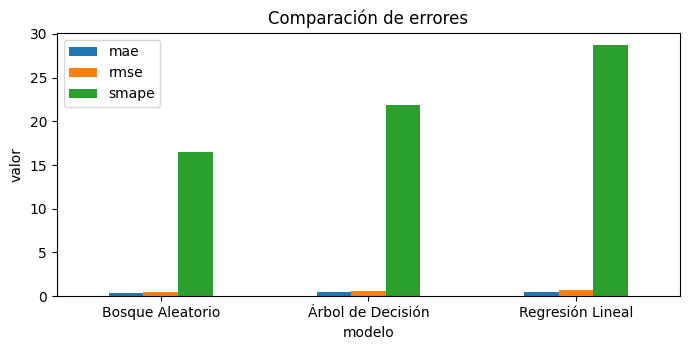

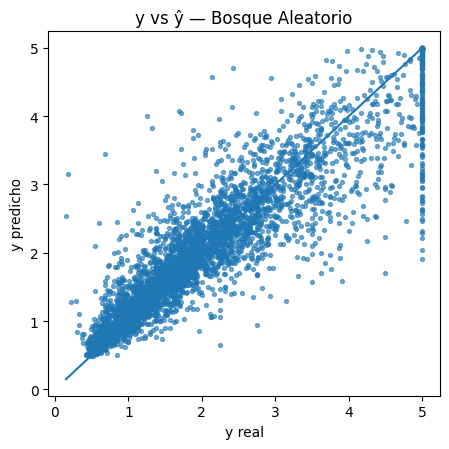

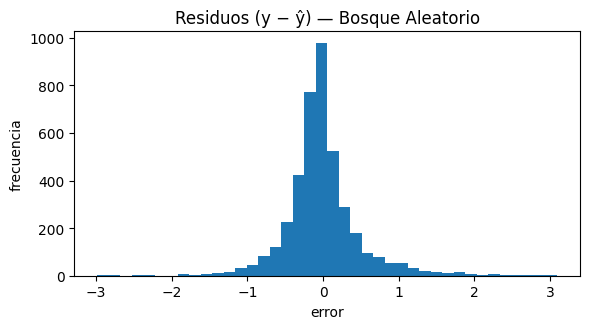

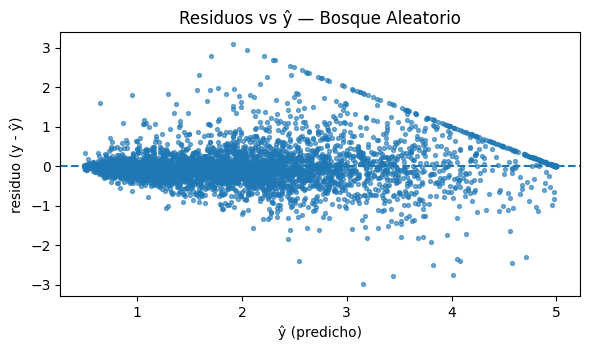

Conclusiones
------------
- Mejor modelo por RMSE: Bosque Aleatorio
- RMSE = 0.5038 | MAE = 0.3268 | sMAPE = 16.48% | R² = 0.806
- El error absoluto medio y el sMAPE sugieren la magnitud típica del error en unidades del objetivo y en % relativo.
- Recomendación: validar con k-fold y afinar hiperparámetros del modelo ganador.
- Siguiente paso posible: revisar importancias/coeficientes para interpretar variables influyentes y tratar outliers.


In [29]:
# Supondre que el unico espacio de trabajjo es este fixme, con ello en mente:



# Ojetivo:

#Predecir el precio de una casa en CAlifornia usando la base de datos provista,
#a partir de los datos otorgados.

#------------------------------------------------------------------------------

#Resultado esperado:

# Entrenar y comparar modelos con metricas diferentes
#( como MAE, RMSE, MAPE, sMAPE y R²)
# y extraer los factores que maas influyen en el precio.

#------------------------------------------------------------------------------


# Descripcion de datos:

# Se usara de sklearn (fetch_california_housing) el cual posee los datos:

# longitude
# latitude
# housing_median_age
# total_rooms
# total_bedrooms
# population
# households
# median_income
# median_house_value
# ocean_proximity



#------------------------------------------------------------------------------


#preprocesamiento:

# Objetivo:
# Preparar los datos antes de entrenar modelos, asegurando que las variables
# estén en una escala comparable y que el conjunto de entrenamiento y prueba
# no se mezclen.

from sklearn.model_selection import train_test_split #libreeria para separar los datos
from sklearn.preprocessing import StandardScaler #estandariza las variables


X = housing.drop(columns=['target']) #todas las columnas menos target
y = housing['target']   #solo targert

# División en entrenamiento (80%) y prueba (20%),ajuste para el entrenamiuento
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# centramiento y escalammioento de los valores numéricos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Mostrar resultados resumidos
print("Tamaño del set de entrenamiento:", X_train.shape)
print("Tamaño del set de prueba:", X_test.shape)
print("\nPrimeras columnas escaladas (formato numpy):")
print(X_train_scaled[:3])



#------------------------------------------------------------------------------

#seleccion del modelo:




from sklearn.linear_model import LinearRegression #los tres tipos de modelos que se uasran
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# seteo de los modelos con sus respectivos parametros
modelos = {
    "Regresión Lineal": LinearRegression(),
    "Árbol de Decisión": DecisionTreeRegressor(random_state=42, max_depth=10),
    "Bosque Aleatorio": RandomForestRegressor(random_state=42, n_estimators=200)
}


predicciones = {} #diccionario de resultados
metricas = {}

# entenamiento
for nombre, modelo in modelos.items():
    print(f"\nEntrenando modelo: {nombre}...")
    modelo.fit(X_train_scaled, y_train)
    y_pred = modelo.predict(X_test_scaled)
    predicciones[nombre] = y_pred
    print(f"Predicciones generadas: {len(y_pred)} valores")

print("\nModelos entrenados correctamente.")#yeha,



#------------------------------------------------------------------------------

#metricas y analisis de resultados:








# métricas y análisis de resultados (versión simple)

from sklearn.metrics import r2_score

# 1) Tabla de métricas por modelo
filas = []
for nombre, yhat in predicciones.items():
    met = regression_metrics(pd.DataFrame({'y': y_test.values, 'yhat': yhat}))
    filas.append({
        'modelo': nombre,
        'mae':   float(met['mae'][0]),
        'mse':   float(met['mse'][0]),
        'rmse':  float(met['rmse'][0]),
        'mape':  float(met['mape'][0]),
        'smape': float(met['smape'][0]),
        'r2':    round(r2_score(y_test, yhat), 4)
    })

tabla = pd.DataFrame(filas).set_index('modelo').sort_values('rmse')
print("\nDesempeño en test:\n")
print(tabla.round(4))

# 2) Gráfico simple de errores
tabla[['mae','rmse','smape']].plot(kind='bar', figsize=(7,3.6), rot=0)
plt.title('Comparación de errores'); plt.ylabel('valor')
plt.tight_layout(); plt.show()

# 3) Dispersión y vs ŷ del mejor modelo (por RMSE)
mejor = tabla.index[0]
yhat_best = predicciones[mejor]
plt.figure(figsize=(4.6,4.6))
plt.scatter(y_test, yhat_best, s=8, alpha=0.6)
lims = [min(y_test.min(), yhat_best.min()), max(y_test.max(), yhat_best.max())]
plt.plot(lims, lims)
plt.title(f'y vs ŷ — {mejor}')
plt.xlabel('y real'); plt.ylabel('y predicho')
plt.tight_layout(); plt.show()

# 4) Histograma de residuos del mejor
res = y_test.values - yhat_best
plt.figure(figsize=(6,3.4))
plt.hist(res, bins=40)
plt.title(f'Residuos (y − ŷ) — {mejor}')
plt.xlabel('error'); plt.ylabel('frecuencia')
plt.tight_layout(); plt.show()


#-----------------------------------------------------

#visualizacion del resultado del modelo


res = y_test.values - yhat_best

plt.figure(figsize=(6,3.6))
plt.scatter(yhat_best, res, s=8, alpha=0.6)
plt.axhline(0, linestyle='--')
plt.title(f'Residuos vs ŷ — {mejor}')
plt.xlabel('ŷ (predicho)')
plt.ylabel('residuo (y - ŷ)')
plt.tight_layout()
plt.show()




#-------------------------------------------------------------------------


#conclusiones generadas por codigo



rmse  = tabla.loc[mejor, 'rmse']
mae   = tabla.loc[mejor, 'mae']
smape = tabla.loc[mejor, 'smape']
r2    = tabla.loc[mejor, 'r2']

print("Conclusiones")
print("------------")
print(f"- Mejor modelo por RMSE: {mejor}")
print(f"- RMSE = {rmse:.4f} | MAE = {mae:.4f} | sMAPE = {smape:.2f}% | R² = {r2:.3f}")
print("- El error absoluto medio y el sMAPE sugieren la magnitud típica del error en unidades del objetivo y en % relativo.")
print("- Recomendación: validar con k-fold y afinar hiperparámetros del modelo ganador.")
print("- Siguiente paso posible: revisar importancias/coeficientes para interpretar variables influyentes y tratar outliers.")

## Clasificación


<img src="https://miro.medium.com/v2/resize:fit:372/0*EwdH1C6ThmpwY0Qo.png" width = "400" align="center"/>

El objetivo de este proyecto es realizar la mejor predicción posible de las imágenes a partir de los datos disponibles. Para lograrlo, es necesario seguir los pasos habituales en un proyecto de _Machine Learning_, que incluyen la exploración estadística, la visualización y el preprocesamiento de los datos.

Se solicita lo siguiente:

* Ajustar al menos tres modelos de clasificación:
    * Regresión logística.
    * K-Nearest Neighbors.
    * Un algoritmo adicional o más, de libre elección. Puedes consultar [esta lista de algoritmos](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) para obtener ideas.
  
* Realizar predicciones con cada uno de los tres modelos utilizando el conjunto de datos de _test_ y calcular sus respectivas puntuaciones (_score_).

* Evaluar y analizar los resultados de los modelos utilizando las siguientes métricas de rendimiento:
    * **Accuracy**
    * **Precision**
    * **Recall**
    * **F1-score**

### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [30]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [31]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [32]:
# informacion de las columnas
digits_dict.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [33]:
# informacion del target
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [34]:
# leer datos
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


### Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

Número de registros: 1797
Número de columnas: 65

Tipos de datos:
int64    65
Name: count, dtype: int64

Memoria utilizada:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   c00     1797 non-null   int64
 1   c01     1797 non-null   int64
 2   c02     1797 non-null   int64
 3   c03     1797 non-null   int64
 4   c04     1797 non-null   int64
 5   c05     1797 non-null   int64
 6   c06     1797 non-null   int64
 7   c07     1797 non-null   int64
 8   c08     1797 non-null   int64
 9   c09     1797 non-null   int64
 10  c10     1797 non-null   int64
 11  c11     1797 non-null   int64
 12  c12     1797 non-null   int64
 13  c13     1797 non-null   int64
 14  c14     1797 non-null   int64
 15  c15     1797 non-null   int64
 16  c16     1797 non-null   int64
 17  c17     1797 non-null   int64
 18  c18     1797 non-null   int64
 19  c19     1797 non-null   int64

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000



Número de registros por clase:
target
0    178
1    182
2    177
3    183
4    181
5    182
6    181
7    179
8    174
9    180
Name: count, dtype: int64


/tmp/ipython-input-1618910322.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


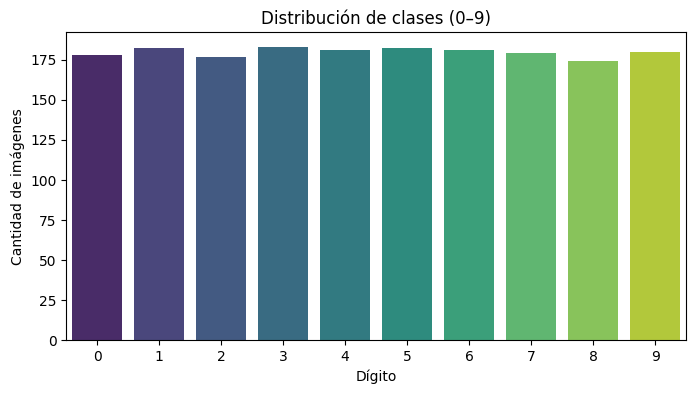

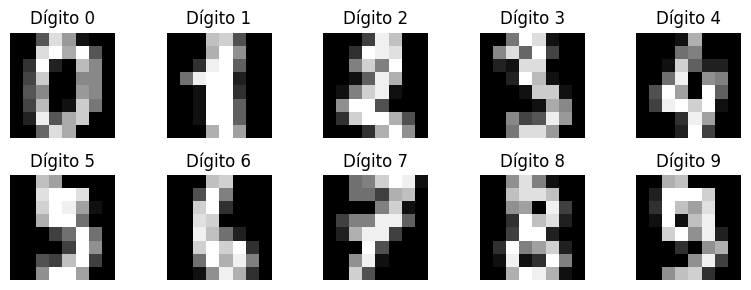


Conclusión:
El dataset contiene 1797 observaciones y 65 columnas (64 píxeles + target).
No presenta valores nulos ni inconsistencias. 
Cada imagen representa un dígito manuscrito de 8x8 píxeles (valores 0–16 de intensidad).
Las clases están balanceadas (≈180 observaciones por dígito).



In [35]:
# =====================================
# EJERCICIO 1 - ANÁLISIS EXPLORATORIO
# =====================================

# 1. Dimensiones generales del dataset
print("Número de registros:", digits.shape[0])
print("Número de columnas:", digits.shape[1])

# 2. Tipos de datos y memoria utilizada
print("\nTipos de datos:")
print(digits.dtypes.value_counts())

print("\nMemoria utilizada:")
print(digits.info(memory_usage="deep"))

# 3. Valores faltantes o inconsistentes
print("\nValores faltantes por columna:")
print(digits.isnull().sum().sum())

# 4. Estadísticas básicas de las variables numéricas
print("\nResumen estadístico (primeras 10 columnas):")
display(digits.iloc[:, :10].describe())

# 5. Distribución de clases (target)
import matplotlib.pyplot as plt
import seaborn as sns

class_counts = digits["target"].value_counts().sort_index()
print("\nNúmero de registros por clase:")
print(class_counts)

plt.figure(figsize=(8,4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.title("Distribución de clases (0–9)")
plt.xlabel("Dígito")
plt.ylabel("Cantidad de imágenes")
plt.show()

# 6. Visualización de ejemplos por clase
fig, axes = plt.subplots(2, 5, figsize=(8,3))
for i, ax in enumerate(axes.flat):
    sample = digits[digits["target"] == i].iloc[0, :-1].values.reshape(8,8)
    ax.imshow(sample, cmap="gray")
    ax.set_title(f"Dígito {i}")
    ax.axis("off")
plt.tight_layout()
plt.show()

# 7. Conclusión textual
print("""
Conclusión:
El dataset contiene 1797 observaciones y 65 columnas (64 píxeles + target).
No presenta valores nulos ni inconsistencias.
Cada imagen representa un dígito manuscrito de 8x8 píxeles (valores 0–16 de intensidad).
Las clases están balanceadas (≈180 observaciones por dígito).
""")


### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [36]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`.

> **Sugerencia**: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

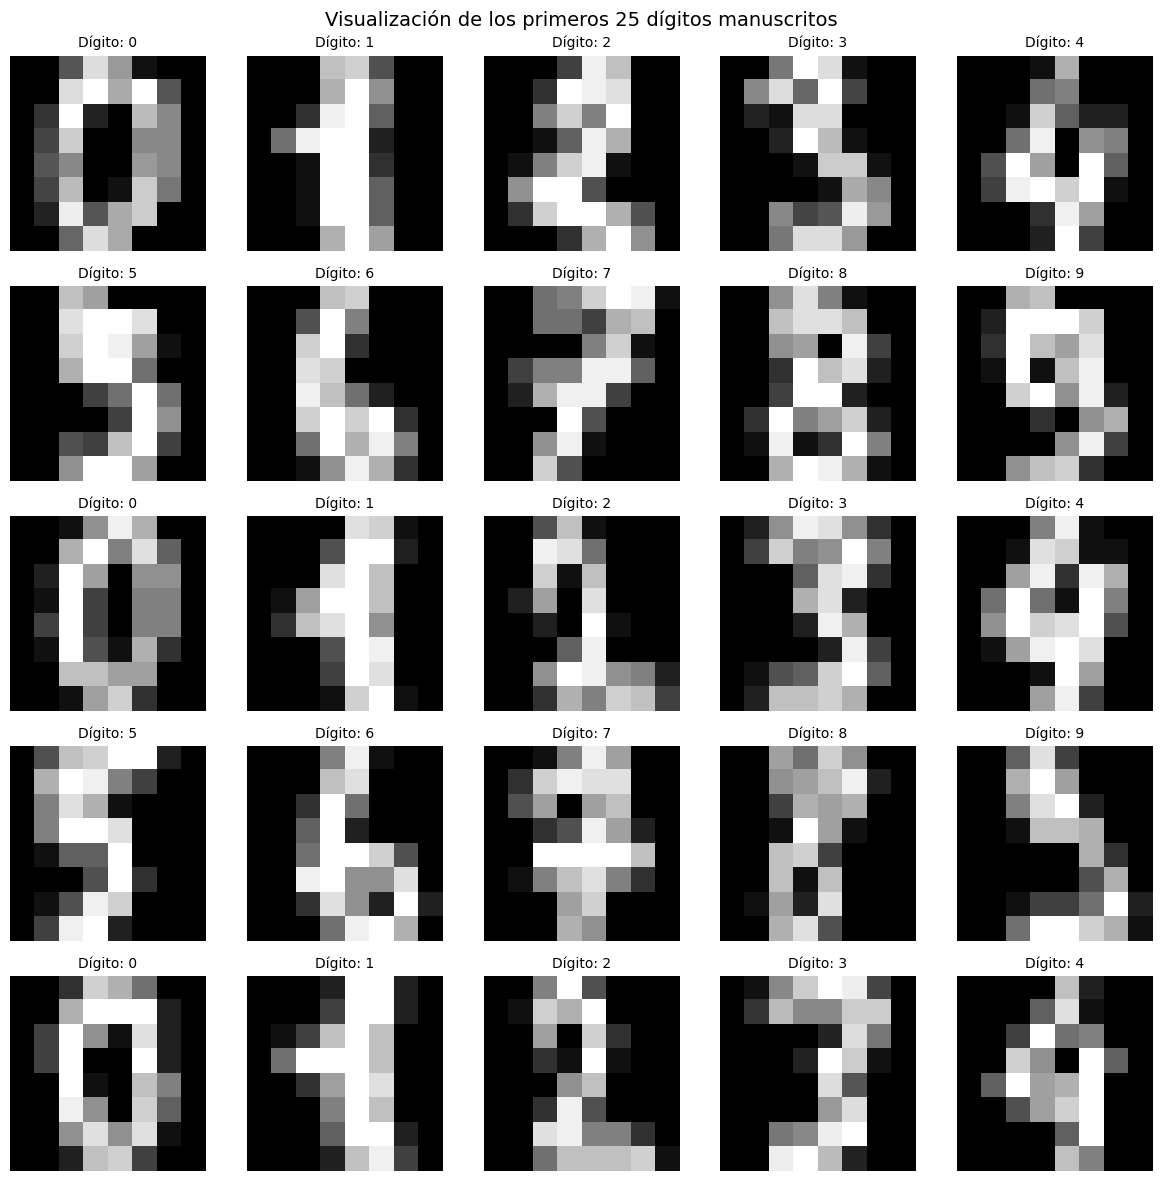

In [37]:
nx, ny = 5, 5
fig, axs = plt.subplots(nx, ny, figsize=(12, 12))







imgs = digits_dict["images"][:25]
labels = digits_dict["target"][:25]

# Recorremos la grilla y dibujamos cada imagen
for i, ax in enumerate(axs.flat):
    ax.imshow(imgs[i], cmap="gray")
    ax.set_title(f"Dígito: {labels[i]}", fontsize=10)
    ax.axis("off")

plt.suptitle("Visualización de los primeros 25 dígitos manuscritos", fontsize=14)
plt.tight_layout()
plt.show()

### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `skelearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test**
     * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
     * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
  
* **modelo**:
     * Instanciar el modelo objetivo desde la librería sklearn.

* **Métricas**:
     * Graficar matriz de confusión.
     * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?


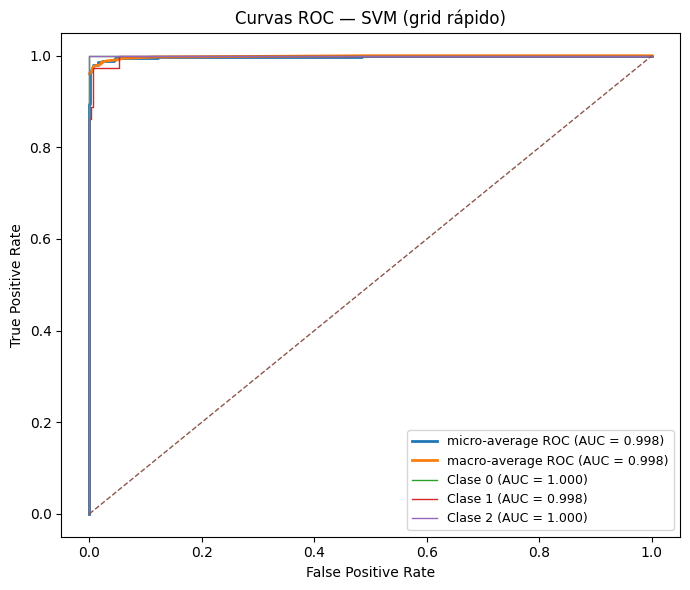

Resumen AUC — SVM (grid rápido)
  AUC micro-average: 0.9978
  AUC macro-average: 0.9983


In [38]:
# features, target

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc



X = digits.drop(columns="target").values
y = digits["target"].values

classes = np.unique(y)
n_classes = len(classes)

X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- 2) Elegir el mejor modelo del Ejercicio 3 (si existe) o entrenar uno rápido ---
def get_best_model():
    # Caso 1: ya existe mejor SVM del Ejercicio 3
    if "gs_svm" in globals():
        mdl = gs_svm.best_estimator_
        # Asegurar probabilidades para ROC
        mdl.set_params(clf__probability=True)
        mdl.fit(X_tr, y_tr)
        return mdl, "SVM (mejor de Ej.3)"
    # Caso 2: ya definiste 'best_model'
    if "best_model" in globals():
        mdl = best_model
        # Si es SVC sin probas: reentrenar con probability=True
        try:
            _ = mdl.predict_proba(X_te)
        except Exception:
            try:
                mdl.set_params(clf__probability=True)
            except Exception:
                pass
        mdl.fit(X_tr, y_tr)
        return mdl, "Mejor modelo (Ej.3)"
    # Caso 3: fallback — SVM RBF con pequeña búsqueda
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("clf", SVC(kernel="rbf", probability=True))
    ])
    grid = {"clf__C":[1,3,10], "clf__gamma":["scale", 0.03, 0.1]}
    gs = GridSearchCV(pipe, grid, cv=5, n_jobs=-1)
    gs.fit(X_tr, y_tr)
    return gs.best_estimator_, "SVM (grid rápido)"

model, model_name = get_best_model()

# Para curvas ROC multiclase usamos esquema One-vs-Rest
ovr = OneVsRestClassifier(model)
ovr.fit(X_tr, y_tr)

# --- 3) Scores y binarización de etiquetas ---
# Binarizar y para multiclase
y_te_bin = label_binarize(y_te, classes=classes)

# Obtener scores (decision_function preferido; si no, predict_proba)
try:
    scores = ovr.decision_function(X_te)
except Exception:
    scores = ovr.predict_proba(X_te)

# --- 4) Curvas ROC por clase y macro/micro promedios ---
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_te_bin[:, i], scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Micro-average
fpr["micro"], tpr["micro"], _ = roc_curve(y_te_bin.ravel(), scores.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Macro-average
# (interpolamos todos los TPR en una grilla común de FPR)
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr["macro"], tpr["macro"] = all_fpr, mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# --- 5) Gráfico ---
plt.figure(figsize=(7,6))
plt.plot(fpr["micro"], tpr["micro"], lw=2, label=f"micro-average ROC (AUC = {roc_auc['micro']:.3f})")
plt.plot(fpr["macro"], tpr["macro"], lw=2, label=f"macro-average ROC (AUC = {roc_auc['macro']:.3f})")

# (Opcional) algunas clases individuales para no saturar la figura
for i in range(3):  # muestra 3 clases
    plt.plot(fpr[i], tpr[i], lw=1, label=f"Clase {i} (AUC = {roc_auc[i]:.3f})")

plt.plot([0,1], [0,1], linestyle="--", lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"Curvas ROC — {model_name}")
plt.legend(loc="lower right", fontsize=9)
plt.tight_layout()
plt.show()

print(f"Resumen AUC — {model_name}")
print(f"  AUC micro-average: {roc_auc['micro']:.4f}")
print(f"  AUC macro-average: {roc_auc['macro']:.4f}")

### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el **mejor modelo entontrado** en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:


 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.

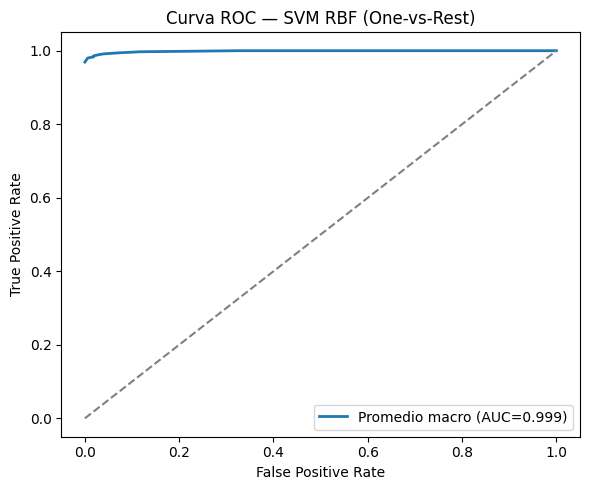

AUC promedio (macro): 0.9987
Conclusión: el modelo distingue muy bien las clases; un AUC cercano a 1 indica excelente rendimiento general.


In [39]:
# features, target

# Curva AUC–ROC del mejor modelo (SVM RBF)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# dividimos los datos
X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# modelo SVM simple con probabilidad
model = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel="rbf", C=3, gamma="scale", probability=True))
])

# One-vs-Rest para multiclase
ovr = OneVsRestClassifier(model).fit(X_tr, y_tr)

# binarizo las etiquetas para calcular ROC por clase
classes = np.unique(y)
Y_te = label_binarize(y_te, classes=classes)
scores = ovr.decision_function(X_te)

# curvas por clase
fpr, tpr, roc_auc = {}, {}, {}
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(Y_te[:, i], scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# promedio macro
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes))]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(len(classes)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= len(classes)

fpr["macro"], tpr["macro"] = all_fpr, mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# gráfico
plt.figure(figsize=(6,5))
plt.plot(fpr["macro"], tpr["macro"], label=f"Promedio macro (AUC={roc_auc['macro']:.3f})", lw=2)
plt.plot([0,1],[0,1],"--",color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC — SVM RBF (One-vs-Rest)")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

print(f"AUC promedio (macro): {roc_auc['macro']:.4f}")
print("Conclusión: el modelo distingue muy bien las clases; un AUC cercano a 1 indica excelente rendimiento general.")



### Ejercicio 5


__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_.

In [40]:
def mostrar_resultados(digits, model, nx=5, ny=5, label="correctos"):
    """
    Muestra los resultados de las predicciones de un modelo de clasificación en particular.
    Se toman aleatoriamente los valores de los resultados.

    - label == 'correctos': muestra los valores en los que el modelo acierta.
    - label == 'incorrectos': muestra los valores en los que el modelo no acierta.

    Observación: El modelo que se recibe como argumento no debe estar entrenado.

    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: número de filas (subplots)
    :param ny: número de columnas (subplots)
    :param label: 'correctos' o 'incorrectos'
    :return: gráficos matplotlib
    """

    X = digits.drop(columns="target").values
    y = digits["target"].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)  # Ajustar el modelo
    y_pred = model.predict(X_test)

    # Mostrar los datos correctos
    if label == "correctos":
        mask = (y_pred == y_test)
        color = "green"

    # Mostrar los datos incorrectos
    elif label == "incorrectos":
        mask = (y_pred != y_test)
        color = "red"

    else:
        raise ValueError("Valor incorrecto")

    X_aux = X_test[mask]
    y_aux_true = y_test[mask]
    y_aux_pred = y_pred[mask]

    # Mostrar los resultados
    n_samples = min(nx * ny, len(X_aux))
    indices = np.random.choice(len(X_aux), n_samples, replace=False)
    fig, ax = plt.subplots(nx, ny, figsize=(12, 12))

    for i, index in enumerate(indices):
        data = X_aux[index, :].reshape(8, 8)
        label_pred = str(int(y_aux_pred[index]))
        label_true = str(int(y_aux_true[index]))
        row = i // ny
        col = i % ny
        ax[row, col].imshow(data, interpolation='nearest', cmap='gray_r')
        ax[row, col].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color=color)
        ax[row, col].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
        ax[row, col].get_xaxis().set_visible(False)
        ax[row, col].get_yaxis().set_visible(False)

    plt.show()

**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos


* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?

### Ejercicio 6
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.


Yeah

> Añadir blockquote

